In [1]:
from mri.models import Scan
from mutual_information.models import MutualInformationScore
from research.models import Subject

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
df = MutualInformationScore.objects.generate_df()

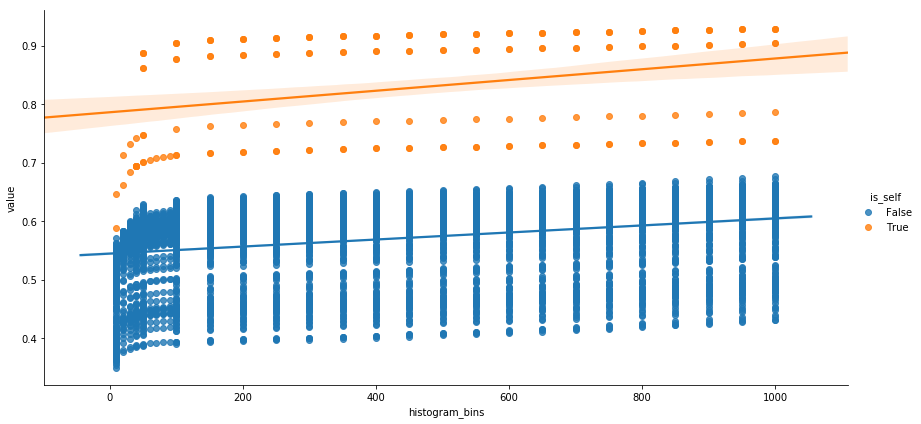

In [6]:
lm = sns.lmplot(x='histogram_bins', y='value', hue='is_self', data=df, height=6, aspect=2)

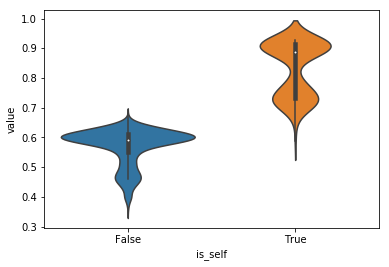

In [30]:
violin = sns.violinplot(x='is_self', y='value', data=df)

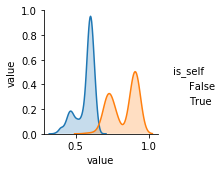

In [47]:
sns.pairplot(df, hue="is_self", vars=['value'])

In [66]:
distance = pd.DataFrame(columns=["histogram_bins", "distance"])
distance['histogram_bins'] = df['histogram_bins'].unique()
distance['distance'] = distance.apply(lambda row: min(df[df['histogram_bins'] == row['histogram_bins']][df['is_self'] == True]['value']) - max(df[df['histogram_bins'] == row['histogram_bins']][df['is_self'] == False]['value']), axis=1)
max_row = distance[distance['distance'] == max(distance['distance'])]
n_bins_max, max_distance = int(max_row['histogram_bins']), float(max_row['distance'])


/home/flavus/Projects/pylabber/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


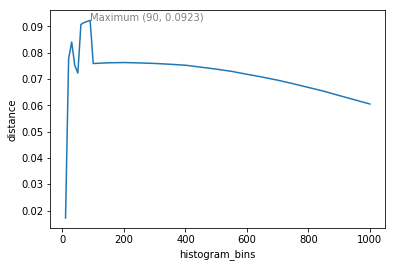

In [70]:
line = sns.lineplot(x="histogram_bins", y="distance", data=distance)
style = dict(size=10, color='gray')
text = line.text(n_bins_max, max_distance, f"Maximum ({n_bins_max}, {round(max_distance, 4)})", **style)